In [19]:
from tools.DataLoader import DataLoader
from tools.EDA import EDA
from tools.DataPreprocessor import DataPreprocessor
from models.ClusterPipeline import ModelPipeline
from tools.FeatureEngineeringTool import FeatureEngineeringTool

from sklearn.pipeline import Pipeline

from sklearn.discriminant_analysis import StandardScaler
from sklearn.cluster import KMeans

In [20]:
# Step 1: Load Data using DataLoader
data_loader = DataLoader(
    request_type="local", path="db/mod_05_topic_10_various_data.pkl"
)
df_dict = data_loader.load_data()
df = df_dict["concrete"]

In [21]:
# Step 2: Perform EDA using the EDA class
eda = EDA(df)

# Perform EDA using the EDA class
eda = EDA(df)
eda.perform_full_eda()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   BlastFurnaceSlag     1030 non-null   float64
 2   FlyAsh               1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   CoarseAggregate      1030 non-null   float64
 6   FineAggregate        1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   CompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


None

,Column,Has_Nulls,Dtype
Cement,Cement,False,float64
BlastFurnaceSlag,BlastFurnaceSlag,False,float64
FlyAsh,FlyAsh,False,float64
Water,Water,False,float64
Superplasticizer,Superplasticizer,False,float64
CoarseAggregate,CoarseAggregate,False,float64
FineAggregate,FineAggregate,False,float64
Age,Age,False,int64
CompressiveStrength,CompressiveStrength,False,float64



Dataset Shape:

(1030, 9)

Descriptive Statistics:



,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
BlastFurnaceSlag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
FlyAsh,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
CoarseAggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
FineAggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
CompressiveStrength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6



Missing Values:



Cement                 0
BlastFurnaceSlag       0
FlyAsh                 0
Water                  0
Superplasticizer       0
CoarseAggregate        0
FineAggregate          0
Age                    0
CompressiveStrength    0
dtype: int64


Sample Data:



,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [22]:
fet = FeatureEngineeringTool(df)

fet.add_count_feature(
    [
        "Cement",
        "BlastFurnaceSlag",
        "FlyAsh",
        "Water",
        "Superplasticizer",
        "CoarseAggregate",
        "FineAggregate",
    ]
)


df = fet.df

Added new feature 'Count' with counts of non-zero materials.


In [23]:
display(df)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength,Count
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,5
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,7
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,6
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,7
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,6


In [24]:
# Initialize DataPreprocessor
preprocessor = DataPreprocessor(df)

In [25]:
preprocessor.initialize_features(df)

In [26]:

numeric_transformers = [
    ("scaler", StandardScaler()),
]
categorical_transformers = [
]

In [27]:
# Create pipeline
preprocessor.create_pipeline(
    numeric_transformers, categorical_transformers
)

# Fit and transform train data
df_transformed = preprocessor.fit_transform(df)

In [28]:
# Visualize pipeline
preprocessor.visualize_pipeline()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Cement', 'BlastFurnaceSlag',
                                                   'FlyAsh', 'Water',
                                                   'Superplasticizer',
                                                   'CoarseAggregate',
                                                   'FineAggregate', 'Age',
                                                   'CompressiveStrength',
                                                   'Count']),
                                                 ('cat', 'drop', [])]))])

In [29]:
model_params = {"random_state": 40}

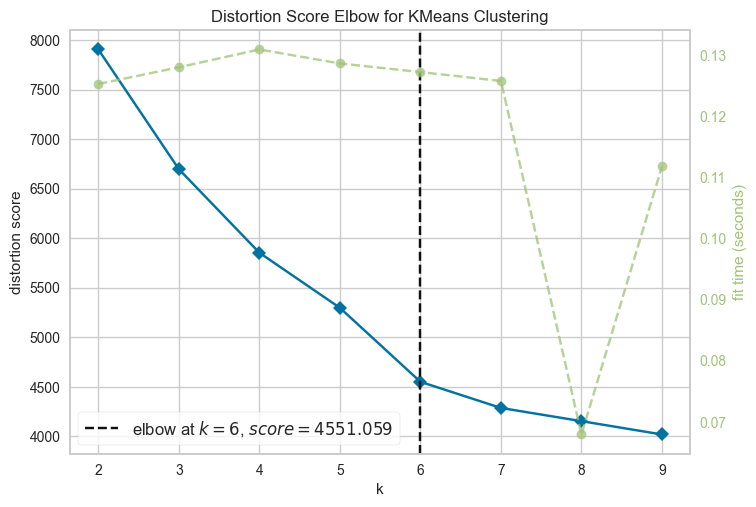

In [30]:
optimal_elbow_value = eda.determine_optimal_clusters(
    df_transformed, k_range=(2, 10), model_params=model_params
)

In [31]:
pipelines = {
    "KMeans": Pipeline(
        [
            ("cluster", KMeans()),
        ]
    ),
}

In [32]:
param_grids = {
    "KMeans": {
        "cluster__n_clusters": [2, 3, 4, 5, 6, 7, 8, 9, 10],
        "cluster__random_state": [40],
    },
}

In [33]:
model_pipeline = ModelPipeline()
model_pipeline.train(df_transformed, pipelines, param_grids, scoring="silhouette_score")

In [34]:
model_pipeline.display_results(df_transformed, help_text=True)

Evaluation Metrics for Best Models:


,Model,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
0,KMeans,0.271587,1.316547,258.705311



Best Parameters for Each Model:


,Model,cluster__n_clusters,cluster__random_state
0,KMeans,6,40



Metric Explanations:
Silhouette Score: Measures how similar an object is to its own cluster compared to other clusters.
  - Range: [-1, 1], higher is better.
  - Higher values indicate better-defined clusters.
Davies-Bouldin Index: Measures the average similarity ratio of each cluster with its most similar cluster.
  - Range: [0, ∞), lower is better.
  - Lower values indicate better clustering.
Calinski-Harabasz Index: Ratio of the sum of between-cluster dispersion to within-cluster dispersion.
  - Range: [0, ∞), higher is better.
  - Higher values indicate better-defined clusters.


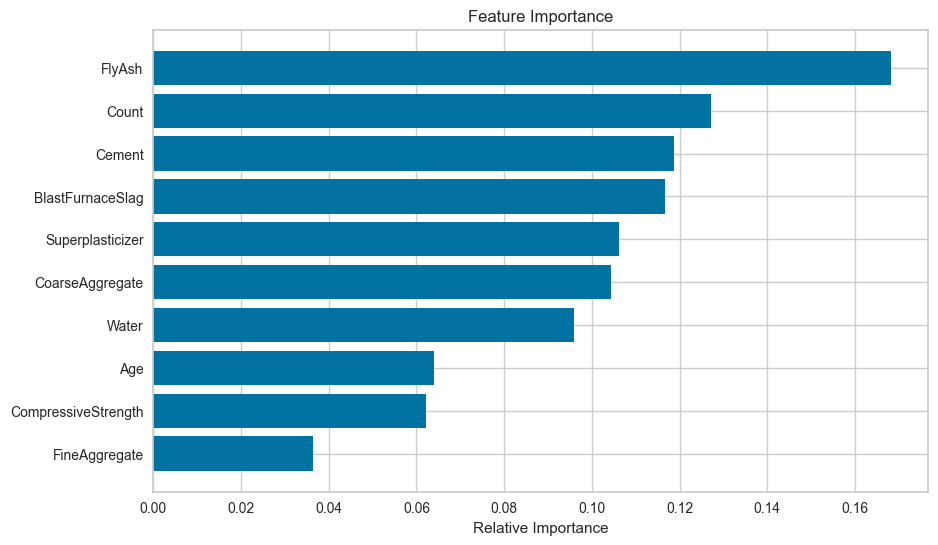

In [35]:
model_pipeline.feature_importance(df_transformed, df_original=df)

In [36]:
cluster_report = model_pipeline.generate_cluster_report(df, df_transformed)


display(cluster_report)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength,Count,ObjectCount
Cluster,,,,,,,,,,,
0,213.70,0.00,121.6,167.0,8.1,1014.3,793.50,28.0,33.360,6.0,285
1,339.00,0.00,0.0,192.0,0.0,1013.2,784.00,28.0,26.060,4.0,197
2,386.00,118.00,0.0,162.0,11.6,938.0,782.00,28.0,56.615,6.0,188
3,183.90,185.30,0.0,192.0,0.0,965.4,749.10,28.0,26.590,5.0,166
4,252.05,110.75,123.0,193.3,8.5,877.6,749.15,28.0,32.325,7.0,138
5,340.50,38.00,0.0,228.0,0.0,932.0,670.00,270.0,43.355,5.0,56


# Analysis of the Report and Conclusions

### Cluster 0
- **Composition**:
  - Cement: 213.70 units
  - No BlastFurnaceSlag
  - FlyAsh: 121.6 units
  - Water: 167.0 units
  - Superplasticizer: 8.1 units
  - CoarseAggregate: 1014.3 units
  - FineAggregate: 793.50 units
  - Age: 28.0 days
- **Strength**: Compressive strength of 33.360 units.
- **Size**: 285 objects.
- **Count**: 6 components on average.
- **Application**: Suitable for mixtures requiring a balanced approach, including moderate strength and cost efficiency due to the presence of FlyAsh and Superplasticizer.

### Cluster 1
- **Composition**:
  - Cement: 339.00 units
  - No BlastFurnaceSlag
  - No FlyAsh
  - Water: 192.0 units
  - No Superplasticizer
  - CoarseAggregate: 1013.2 units
  - FineAggregate: 784.00 units
  - Age: 28.0 days
- **Strength**: Compressive strength of 26.060 units.
- **Size**: 197 objects.
- **Count**: 4 components on average.
- **Application**: Suitable for basic construction needs where high strength is not a primary concern, focusing on simplicity and lower cost.

### Cluster 2
- **Composition**:
  - Cement: 386.00 units
  - BlastFurnaceSlag: 118.00 units
  - No FlyAsh
  - Water: 162.0 units
  - Superplasticizer: 11.6 units
  - CoarseAggregate: 938.0 units
  - FineAggregate: 782.00 units
  - Age: 28.0 days
- **Strength**: Compressive strength of 56.615 units.
- **Size**: 188 objects.
- **Count**: 6 components on average.
- **Application**: Ideal for high-strength construction applications where durability and reliability are crucial, benefiting from a diverse and robust mix of materials.

### Cluster 3
- **Composition**:
  - Cement: 183.90 units
  - BlastFurnaceSlag: 185.30 units
  - No FlyAsh
  - Water: 192.0 units
  - No Superplasticizer
  - CoarseAggregate: 965.4 units
  - FineAggregate: 749.10 units
  - Age: 28.0 days
- **Strength**: Compressive strength of 26.590 units.
- **Size**: 166 objects.
- **Count**: 5 components on average.
- **Application**: Suitable for projects requiring cost efficiency with moderate strength, leveraging BlastFurnaceSlag to reduce the overall cost while maintaining structural integrity.

### Cluster 4
- **Composition**:
  - Cement: 252.05 units
  - BlastFurnaceSlag: 110.75 units
  - FlyAsh: 123.0 units
  - Water: 193.3 units
  - Superplasticizer: 8.5 units
  - CoarseAggregate: 877.6 units
  - FineAggregate: 749.15 units
  - Age: 28.0 days
- **Strength**: Compressive strength of 32.325 units.
- **Size**: 138 objects.
- **Count**: 7 components on average.
- **Application**: Useful for specialized applications where a balanced and well-rounded mixture is required, utilizing a variety of components to achieve desired properties.

### Cluster 5
- **Composition**:
  - Cement: 340.50 units
  - BlastFurnaceSlag: 38.00 units
  - No FlyAsh
  - Water: 228.0 units
  - No Superplasticizer
  - CoarseAggregate: 932.0 units
  - FineAggregate: 670.00 units
  - Age: 270.0 days
- **Strength**: Compressive strength of 43.355 units.
- **Size**: 56 objects.
- **Count**: 5 components on average.
- **Application**: Suitable for long-term projects where higher compressive strength is required, and the mixture needs to endure longer curing periods.

## General Conclusions

1. **Composition and Strength**:
   - Cluster 2 has the highest compressive strength with a diverse composition, including high levels of cement, BlastFurnaceSlag, and Superplasticizer.
   - Cluster 1 has the lowest compressive strength, with no additives like BlastFurnaceSlag, FlyAsh, or Superplasticizer.

2. **Cluster Sizes**:
   - Cluster 0 is the largest with 285 objects, while Cluster 5 is the smallest with 56 objects.

3. **Applications**:
   - Cluster 0: Suitable for mixtures requiring a balanced approach, including moderate strength and cost efficiency.
   - Cluster 1: Suitable for basic construction needs with a focus on simplicity and lower cost.
   - Cluster 2: Ideal for high-strength construction applications requiring durability and reliability.
   - Cluster 3: Suitable for cost-efficient projects with moderate strength.
   - Cluster 4: Useful for specialized applications requiring a balanced mixture.
   - Cluster 5: Suitable for long-term projects requiring higher compressive strength and longer curing periods.